# 3.1 Numpy 和 Pandas 有什么不同

###### 如果用 python 的列表和字典来作比较, 那么可以说 Numpy 是列表形式的，没有数值标签，而 Pandas 就是字典形式。Pandas是基于Numpy构建的，让Numpy为中心的应用变得更加简单。

### Series和DataFrame

In [4]:
import pandas as pd
import numpy as np
s = pd.Series([1,3,6,np.nan,44,1])
print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


##### Series的字符串表现形式为：索引在左边，值在右边。由于我们没有为数据指定索引。于是会自动创建一个0到N-1（N为长度）的整数型索引。

In [5]:
dates = pd.date_range('20160101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])

print(df)

                   a         b         c         d
2016-01-01 -0.001091 -0.401771 -1.433084 -0.993730
2016-01-02 -1.127932 -0.981733  1.088799 -0.964666
2016-01-03 -1.516975 -1.126474  2.067735 -1.379416
2016-01-04 -0.362348 -0.207045  0.467039  1.139676
2016-01-05 -0.095419 -1.025565  0.063662  1.622352
2016-01-06 -0.615314 -2.364201 -0.263671  1.302613


DataFrame是一个表格型的数据结构，它包含有一组有序的列，每列可以是不同的值类型（数值，字符串，布尔值等）。DataFrame既有行索引也有列索引， 它可以被看做由Series组成的大字典。

我们可以根据每一个不同的索引来挑选数据, 比如挑选 b 的元素:

In [6]:
print(df['b'])

2016-01-01   -0.401771
2016-01-02   -0.981733
2016-01-03   -1.126474
2016-01-04   -0.207045
2016-01-05   -1.025565
2016-01-06   -2.364201
Freq: D, Name: b, dtype: float64


创建一组没有给定行标签和列标签的数据 df1

In [7]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


会采取默认的从0开始 index

In [8]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
                    
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


这种方法能对每一列的数据进行特殊对待,类似于数据表中的一列属性操作。可以用 dtypes查看数据中的类型。

In [11]:
print(df2.dtypes)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


对列的序号

In [20]:
print(df2.index)

Int64Index([0, 1, 2, 3], dtype='int64')


 每种数据的名称

In [21]:
print(df2.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


查看所有df2的值

In [22]:
print(df2.values)

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


数据的总结

In [23]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


翻转数据, transpose

In [24]:
print(df2.T)

                     0                    1                    2  \
A                    1                    1                    1   
B  2013-01-02 00:00:00  2013-01-02 00:00:00  2013-01-02 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2013-01-02 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  


对数据的 index 进行排序并输出

In [25]:
print(df2.sort_index(axis=1, ascending=False))

     F      E  D    C          B    A
0  foo   test  3  1.0 2013-01-02  1.0
1  foo  train  3  1.0 2013-01-02  1.0
2  foo   test  3  1.0 2013-01-02  1.0
3  foo  train  3  1.0 2013-01-02  1.0


对数据 值 排序输出

In [26]:
print(df2.sort_values(by='B'))

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


# 3.2 pandas 选择数据

In [28]:
dates = pd.date_range('20210209',periods=6)
df= pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df)

             A   B   C   D
2021-02-09   0   1   2   3
2021-02-10   4   5   6   7
2021-02-11   8   9  10  11
2021-02-12  12  13  14  15
2021-02-13  16  17  18  19
2021-02-14  20  21  22  23


简单的筛选 
如果我们想选取DataFrame中的数据，下面描述了两种途径, 他们都能达到同一个目的

In [29]:
print(df['A'])
print(df.A)

2021-02-09     0
2021-02-10     4
2021-02-11     8
2021-02-12    12
2021-02-13    16
2021-02-14    20
Freq: D, Name: A, dtype: int32
2021-02-09     0
2021-02-10     4
2021-02-11     8
2021-02-12    12
2021-02-13    16
2021-02-14    20
Freq: D, Name: A, dtype: int32


##### 选择跨越多行或多列

In [38]:
# 不包含3
print(df[0:3])

            A  B   C   D
2021-02-09  0  1   2   3
2021-02-10  4  5   6   7
2021-02-11  8  9  10  11


In [39]:
print(df['20210209':'20210211'])

            A  B   C   D
2021-02-09  0  1   2   3
2021-02-10  4  5   6   7
2021-02-11  8  9  10  11


##### 根据标签 loc
同样我们可以使用标签来选择数据 loc, 本例子主要通过标签名字选择某一行数据， 或者通过选择某行或者所有行（:代表所有行）然后选其中某一列或几列数据

In [40]:
print(df.loc['20210209'])

A    0
B    1
C    2
D    3
Name: 2021-02-09 00:00:00, dtype: int32


In [41]:
print(df.loc['20210209',['A','B']])

A    0
B    1
Name: 2021-02-09 00:00:00, dtype: int32


##### 根据序列 iloc 
另外我们可以采用位置进行选择 iloc, 在这里我们可以通过位置选择在不同情况下所需要的数据例如选某一个，连续选或者跨行选等操作。

In [45]:
print(df)
print(df.iloc[3,1])
print(df.iloc[3:5,1:3])

             A   B   C   D
2021-02-09   0   1   2   3
2021-02-10   4   5   6   7
2021-02-11   8   9  10  11
2021-02-12  12  13  14  15
2021-02-13  16  17  18  19
2021-02-14  20  21  22  23
13
             B   C
2021-02-12  13  14
2021-02-13  17  18


In [46]:
print(df.iloc[[1,3,5],1:3])

             B   C
2021-02-10   5   6
2021-02-12  13  14
2021-02-14  21  22


##### 根据混合的这两种 ix 
当然我们可以采用混合选择 ix, 其中选择'A'和'C'的两列，并选择前三行的数据

In [48]:
print(df.ix[:3,['A','C']])

            A   C
2021-02-09  0   2
2021-02-10  4   6
2021-02-11  8  10


G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


##### 通过判断的筛选 
最后我们可以采用判断指令 (Boolean indexing) 进行选择. 我们可以约束某项条件然后选择出当前所有数据.

In [49]:
print(df[df.A>8])

             A   B   C   D
2021-02-12  12  13  14  15
2021-02-13  16  17  18  19
2021-02-14  20  21  22  23


# 3.3 Pandas 设置值

##### 创建数据 
我们可以根据自己的需求, 用 pandas 进行更改数据里面的值, 或者加上一些空的,或者有数值的列.

首先建立了一个 6X4 的矩阵数据。

In [66]:
dates = pd.date_range('20210209',periods=6)
df= pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df)

             A   B   C   D
2021-02-09   0   1   2   3
2021-02-10   4   5   6   7
2021-02-11   8   9  10  11
2021-02-12  12  13  14  15
2021-02-13  16  17  18  19
2021-02-14  20  21  22  23


##### 根据位置设置 loc 和 iloc  
loc 位置  iloc 序列
我们可以利用索引或者标签确定需要修改值的位置。

In [69]:
df.iloc[2,2] = 1111
df.loc['20200211','B'] = 2222
print(df)

                        A       B       C     D
2021-02-09 00:00:00   0.0     1.0     2.0   3.0
2021-02-10 00:00:00   4.0     5.0     6.0   7.0
2021-02-11 00:00:00   8.0     0.0  1111.0  11.0
2021-02-12 00:00:00  12.0     0.0    14.0  15.0
2021-02-13 00:00:00  16.0     0.0    18.0  19.0
2021-02-14 00:00:00  20.0     0.0    22.0  23.0
20200211              NaN  2222.0     NaN   NaN


##### 根据条件设置 
如果现在的判断条件是这样, 我们想要更改B中的数, 而更改的位置是取决于 A 的. 对于A大于4的位置. 更改B在相应位置上的数为0.

In [70]:
df.B[df.A > 4] = 0
print(df)

                        A       B       C     D
2021-02-09 00:00:00   0.0     1.0     2.0   3.0
2021-02-10 00:00:00   4.0     5.0     6.0   7.0
2021-02-11 00:00:00   8.0     0.0  1111.0  11.0
2021-02-12 00:00:00  12.0     0.0    14.0  15.0
2021-02-13 00:00:00  16.0     0.0    18.0  19.0
2021-02-14 00:00:00  20.0     0.0    22.0  23.0
20200211              NaN  2222.0     NaN   NaN


##### 按行或列设置 
如果对整列做批处理, 加上一列 'F', 并将 F 列全改为 NaN, 如下:


In [71]:
df['F'] = np.nan
print(df)

                        A       B       C     D   F
2021-02-09 00:00:00   0.0     1.0     2.0   3.0 NaN
2021-02-10 00:00:00   4.0     5.0     6.0   7.0 NaN
2021-02-11 00:00:00   8.0     0.0  1111.0  11.0 NaN
2021-02-12 00:00:00  12.0     0.0    14.0  15.0 NaN
2021-02-13 00:00:00  16.0     0.0    18.0  19.0 NaN
2021-02-14 00:00:00  20.0     0.0    22.0  23.0 NaN
20200211              NaN  2222.0     NaN   NaN NaN


##### 添加数据 
用上面的方法也可以加上 Series 序列（但是长度必须对齐）。

In [72]:
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210209',periods=6)) 
print(df)

                        A       B       C     D   F    E
2021-02-09 00:00:00   0.0     1.0     2.0   3.0 NaN  1.0
2021-02-10 00:00:00   4.0     5.0     6.0   7.0 NaN  2.0
2021-02-11 00:00:00   8.0     0.0  1111.0  11.0 NaN  3.0
2021-02-12 00:00:00  12.0     0.0    14.0  15.0 NaN  4.0
2021-02-13 00:00:00  16.0     0.0    18.0  19.0 NaN  5.0
2021-02-14 00:00:00  20.0     0.0    22.0  23.0 NaN  6.0
20200211              NaN  2222.0     NaN   NaN NaN  NaN


# 3.4 处理丢失数据

##### 创建含 NaN 的矩阵 
有时候我们导入或处理数据, 会产生一些空的或者是 NaN 数据,如何删除或者是填补这些 NaN 数据就是我们今天所要提到的内容.

建立了一个6X4的矩阵数据并且把两个位置置为空.

In [74]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


##### pd.dropna() 
如果想直接去掉有 NaN 的行或列, 可以使用 dropna

In [76]:
df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    ) 

,A,B,C,D
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


##### pd.fillna() 
如果是将 NaN 的值用其他值代替, 比如代替成 0:

In [77]:
df.fillna(value=0)

,A,B,C,D
2013-01-01,0,0.0,2.0,3
2013-01-02,4,5.0,0.0,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


##### pd.isnull() 
判断是否有缺失数据 NaN, 为 True 表示缺失数据:

In [78]:
df.isnull() 

,A,B,C,D
2013-01-01,False,True,False,False
2013-01-02,False,False,True,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
2013-01-06,False,False,False,False


检测在数据中是否存在 NaN, 如果存在就返回 True:

In [79]:
np.any(df.isnull()) == True  

True

# 3.5 Pandas 导入导出 

pandas可以读取与存取的资料格式有很多种，像csv、excel、json、html与pickle等…， 详细请看官方说明文件

In [81]:
# import pandas as pd #加载模块

# #读取csv https://github.com/MorvanZhou/tutorials/blob/master/numpy%26pandas/15_read_to/student.csv
# data = pd.read_csv('student.csv')

# #打印出data
# print(data)

##### 将数据存取为pickle

In [83]:
# data.to_pickle('student.pickle')

# 3.6 Pandas 合并 concat

### 要点 
pandas处理多组数据的时候往往会要用到数据的合并处理,使用 concat是一种基本的合并方式.而且concat中有很多参数可以调整,合并成你想要的数据形式.

### axis (合并方向) 
axis=0是预设值，因此未设定任何参数时，函数默认axis=0。

In [89]:
df1 = pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1,columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2,columns=['a','b','c','d'])

In [90]:
#concat纵向合并
res = pd.concat([df1, df2, df3], axis=0)
#打印结果
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


### ignore_index (重置 index)
仔细观察会发现结果的index是0, 1, 2, 0, 1, 2, 0, 1, 2，若要将index重置，请看例子二

In [91]:
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

#打印结果
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


### join (合并方式) 
join='outer'为预设值，因此未设定任何参数时，函数默认join='outer'。此方式是依照column来做纵向合并，有相同的column上下合并在一起，其他独自的column个自成列，原本没有值的位置皆以NaN填充。

In [98]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#纵向"外"合并df1与df2
# res = pd.concat([df1, df2], axis=0, join='outer',sort=False)
# res = pd.concat([df1, df2], axis=0, join='outer',ignore_index=True)
res = pd.concat([df1, df2], axis=0, join='outer')



print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


G:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


原理同上个例子的说明，但只有相同的column合并在一起，其他的会被抛弃

In [100]:
#承上一个例子

#纵向"内"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='inner')
#打印结果
print(res)

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0


In [101]:
#重置index并打印结果
res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


### join_axes (依照 axes 合并)

In [102]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#依照`df1.index`进行横向合并
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])

#打印结果
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


### 移除join_axes，并打印结果

In [103]:
res = pd.concat([df1, df2], axis=1)
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


### append (添加数据) 
append只有纵向合并，没有横向合并

In [109]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
s1 = pd.Series(np.ones((1*4))*3, index=['a','b','c','d'])


#将df2合并到df1的下面，以及重置index，并打印出结果
res = df1.append(df2, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


In [110]:
#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果
res = df1.append([df2, df3], ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [111]:
#合并series，将s1合并至df1，以及重置index，并打印出结果
res = df1.append(s1, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  3.0  3.0  3.0  3.0


# 3.7 Pandas 合并 merge

### 要点 
pandas中的merge和concat类似,但主要是用于**两组有key column的数据,统一索引的数据**. 通常也被用在Database的处理当中.

### 依据一组key合并

In [3]:
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [5]:
#依据key column合并，并打印出
res = pd.merge(left, right, on='key')
print(res)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


### 依据两组key合并 
合并时有4种方法how = ['left', 'right', 'outer', 'inner']，预设值how='inner'。

In [7]:
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print(right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


In [8]:
#依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2


In [9]:
res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)

  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3


In [10]:
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


In [11]:
res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)

  key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3


### Indicator 
indicator=True会将合并的记录放在新的一列。

In [14]:
#定义资料集并打印出
df1 = pd.DataFrame({'col1':[0,1],'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2


In [15]:
# 依据col1进行合并，并启用indicator=True，最后打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)

   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


In [16]:
# 自定indicator column的名称，并打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)

   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


### 依据index合并

In [17]:
#定义资料集并打印出
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

print(left)
print(right)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [18]:
#依据左右资料集的index进行合并，how='outer',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [19]:
#依据左右资料集的index进行合并，how='inner',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


### 解决overlapping的问题

In [22]:
#定义资料集
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)

    k  age
0  K0    1
1  K1    2
2  K2    3
    k  age
0  K0    4
1  K0    5
2  K3    6


In [23]:
#使用suffixes解决overlapping的问题
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


# 3.8 Pandas plot 出图

这次讲如何将数据可视化. 首先import我们需要用到的模块，除了 pandas，我们也需要使用 numpy 生成一些数据，这节里使用的 matplotlib 仅仅是用来 show 图片的, 即 plt.show()。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 创建一个Series 
这是一个线性的数据，我们随机生成1000个数据，Series 默认的 index 就是从0开始的整数，但是这里我显式赋值以便让大家看的更清楚

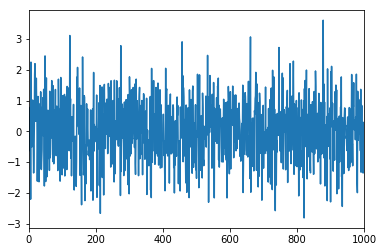

In [6]:
# 随机生成1000个数据
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
 
# 为了方便观看效果, 我们累加这个数据
data.cumsum()

# pandas 数据可以直接观看其可视化形式
data.plot()
plt.show()
# 可以使用 plt.plot(x=, y=)，把x,y的数据作为参数存进去，但是data本来就是一个数据，所以我们可以直接plot。 生成的结果就是下图

### Dataframe 可视化 
我们生成一个1000*4 的DataFrame，并对他们累加

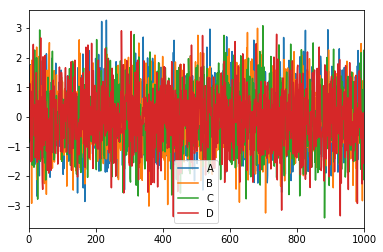

In [15]:
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
    )
data.cumsum()
data.plot()
plt.show()

这个就是我们刚刚生成的4个column的数据，因为有4组数据，所以4组数据会分别plot出来。plot 可以指定很多参数，具体的用法大家可以自己查一下这里

除了plot，我经常会用到还有scatter，这个会显示散点图，首先给大家说一下在 pandas 中有多少种方法

bar
hist
box
kde
area
scatter
hexbin
但是我们今天不会一一介绍，主要说一下 plot 和 scatter. 因为scatter只有x，y两个属性，我们我们就可以分别给x, y指定数据

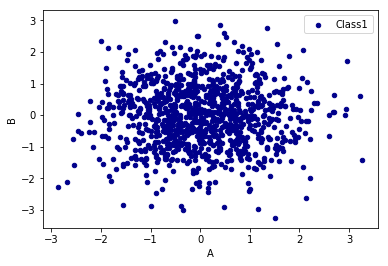

In [19]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')

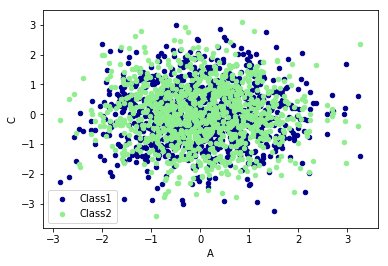

In [21]:
# 将之下这个 data 画在上一个 ax 上面
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()

# 3.9  Numpy熟练后的正确用法
https://mofanpy.com/tutorials/data-manipulation/np-pd/speed-up-numpy/

多用切片，少用索引
非常有用的 out 参数
给数据一个名字

如果是上面那样, 我们就会触发之前提到的 copy 原则, 这两个被赋值的 a, 都是原来 a 的一个 copy, 并不是 a 的 view. 但是在功能里面有一个 out 参数, 让我们不必要重新创建一个 a. 

In [23]:
a = 0
a = a + 1         # time = 0.035230
a = np.add(a, 1)  # time = 0.032738